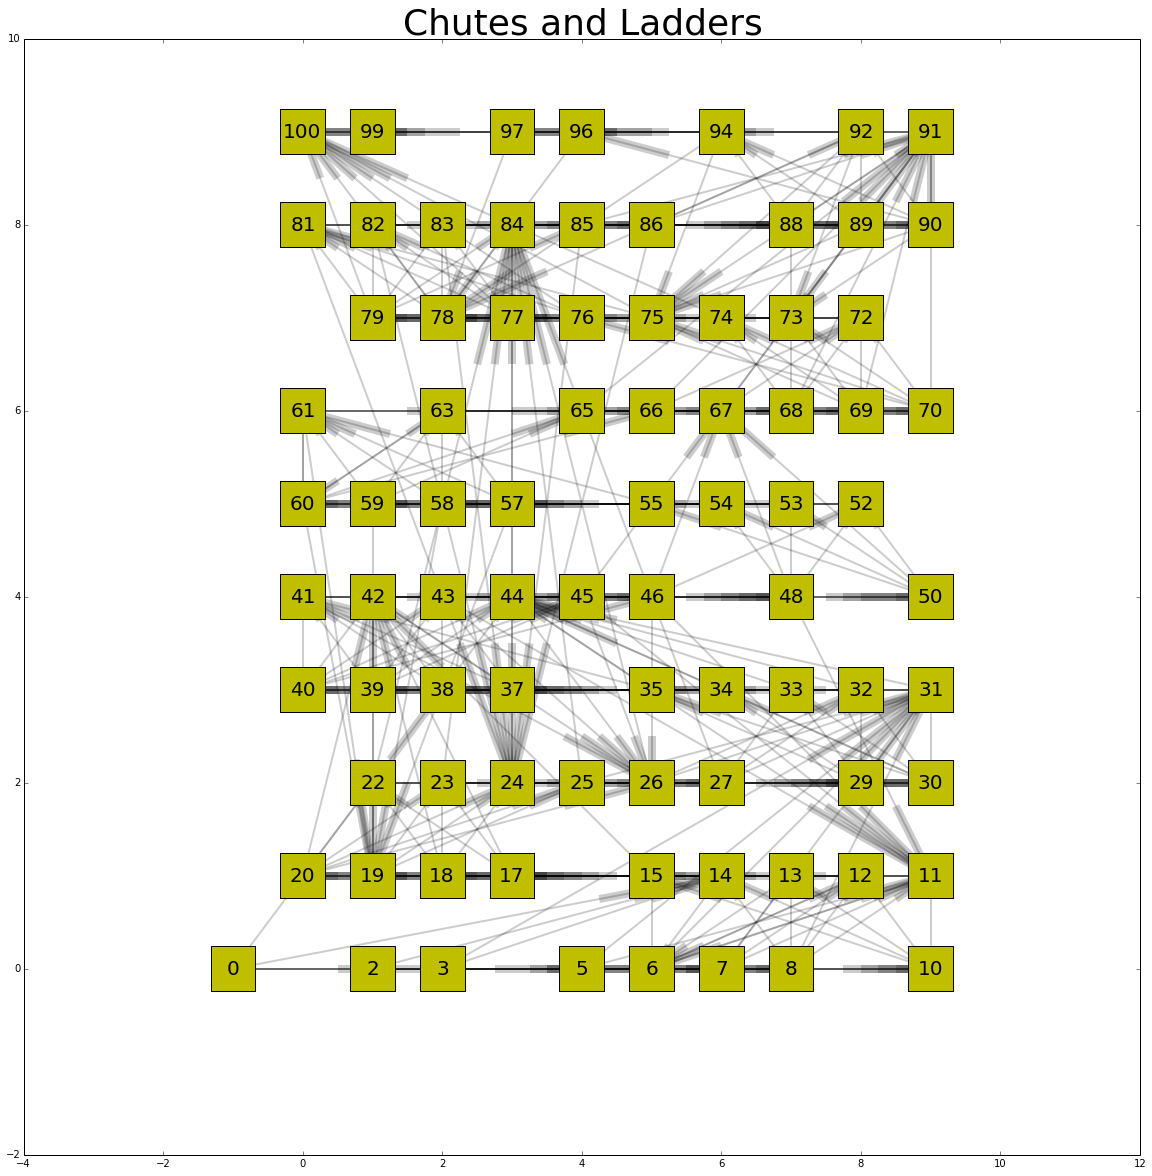

In [44]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# set up the game board
CHUTES = [
    (16, 6),
    (47, 26),
    (49, 11),
    (56, 53),
    (62, 19),
    (64, 60),
    (87, 24),
    (93, 73),
    (95, 75),
    (98, 78),
]
LADDERS = [
    (1, 38),
    (4, 14),
    (9, 31),
    (21, 42),
    (28, 84),
    (36, 44),
    (51, 67),
    (71, 91),
    (80, 100),
]
chutes_and_ladders = dict(CHUTES + LADDERS)

nodes = set(range(0, 101, 1)) - set(chutes_and_ladders)
edge_weights = {}
for node in nodes - {100}:
    for i in xrange(1, 7):
        edge = (node, min(100, chutes_and_ladders.get(node + i, node + i)))
        edge_weights.setdefault(edge, 0)
        edge_weights[edge] += 1
edges = [(k[0], k[1], v) for k, v in edge_weights.iteritems()]


G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
pos = {}
for node in G.nodes_iter():
    pos[node] = (
        (node - 1) % 10 if ((node - 1) / 10) % 2 == 0 else 9 - ((node - 1) % 10),
        (node - 1) / 10
    )
pos[0] = (-1, 0)

def draw_graph(title='Chutes and Ladders', labels=None):
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='y', node_shape='s')
    nx.draw_networkx_edges(G, pos, alpha=0.2, width=2)
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=20)
    plt.title(title, fontdict={'fontsize': 36})
    fig = plt.gcf()
    fig.set_size_inches(20, 20)
    

draw_graph()

In [118]:
# all the way to win the game in 7 moves (7 is fewest possible number of moves)

list(nx.all_shortest_paths(G, 0, 100))

[[0, 38, 39, 45, 67, 68, 74, 100],
 [0, 38, 40, 45, 67, 68, 74, 100],
 [0, 38, 41, 45, 67, 68, 74, 100],
 [0, 38, 42, 45, 67, 68, 74, 100],
 [0, 38, 43, 45, 67, 68, 74, 100],
 [0, 38, 44, 45, 67, 68, 74, 100],
 [0, 38, 40, 46, 67, 68, 74, 100],
 [0, 38, 41, 46, 67, 68, 74, 100],
 [0, 38, 42, 46, 67, 68, 74, 100],
 [0, 38, 43, 46, 67, 68, 74, 100],
 [0, 38, 44, 46, 67, 68, 74, 100],
 [0, 38, 42, 48, 67, 68, 74, 100],
 [0, 38, 43, 48, 67, 68, 74, 100],
 [0, 38, 44, 48, 67, 68, 74, 100],
 [0, 38, 44, 50, 67, 68, 74, 100],
 [0, 38, 39, 45, 67, 69, 74, 100],
 [0, 38, 40, 45, 67, 69, 74, 100],
 [0, 38, 41, 45, 67, 69, 74, 100],
 [0, 38, 42, 45, 67, 69, 74, 100],
 [0, 38, 43, 45, 67, 69, 74, 100],
 [0, 38, 44, 45, 67, 69, 74, 100],
 [0, 38, 40, 46, 67, 69, 74, 100],
 [0, 38, 41, 46, 67, 69, 74, 100],
 [0, 38, 42, 46, 67, 69, 74, 100],
 [0, 38, 43, 46, 67, 69, 74, 100],
 [0, 38, 44, 46, 67, 69, 74, 100],
 [0, 38, 42, 48, 67, 69, 74, 100],
 [0, 38, 43, 48, 67, 69, 74, 100],
 [0, 38, 44, 48, 67,

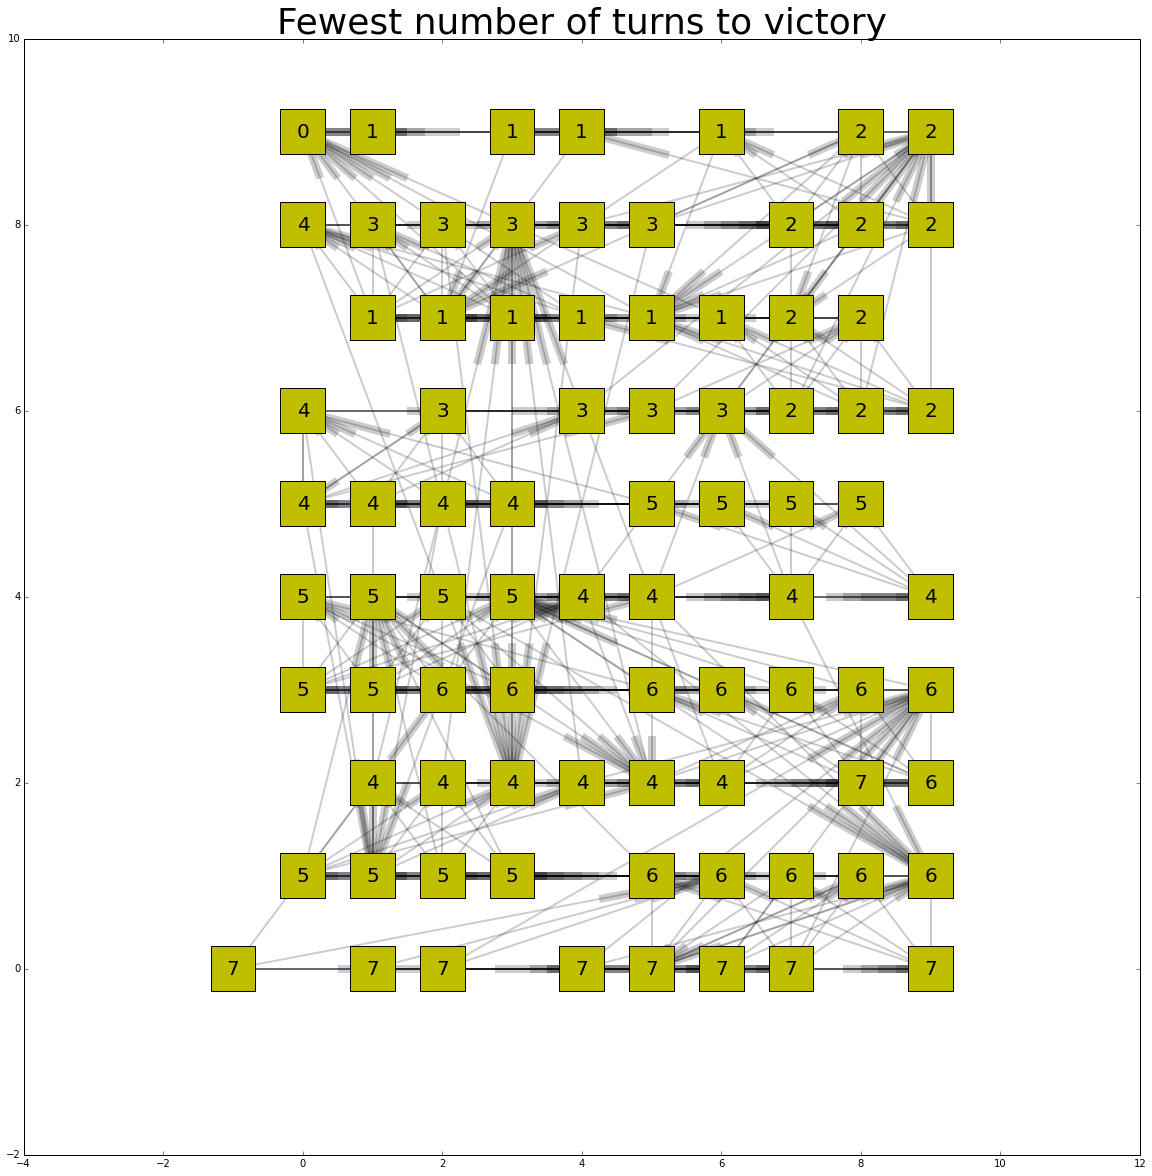

In [45]:
shortest_paths = {n: nx.shortest_path_length(G, n, 100) for n in nodes}
draw_graph(title='Fewest number of turns to victory', labels=shortest_paths)

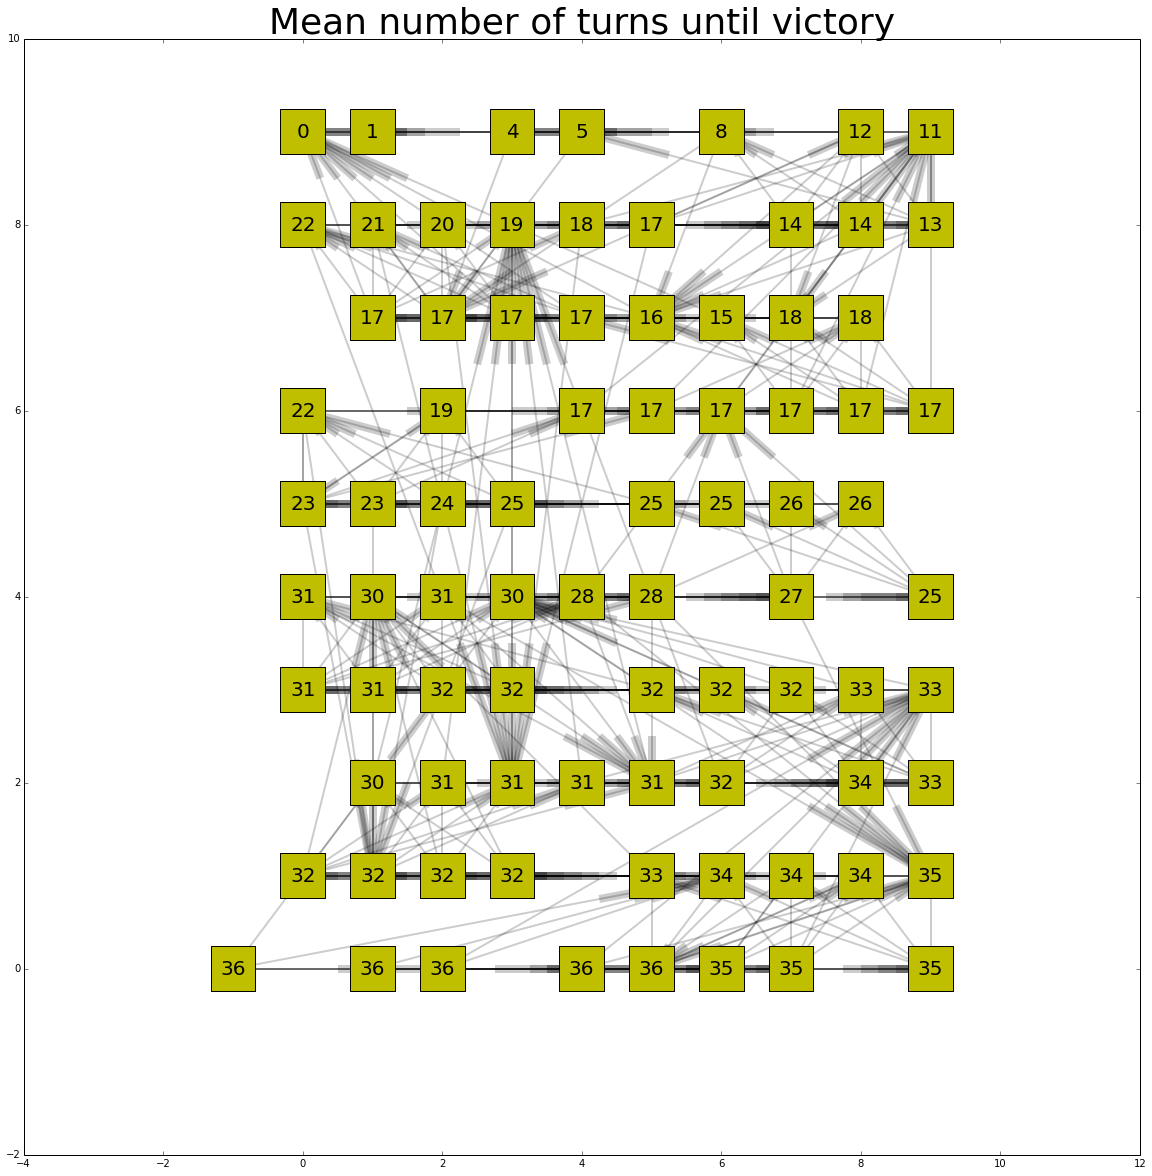

In [46]:
# mean number of turns until victory
A = nx.to_numpy_matrix(G, weight='weight') / 6.
ones = np.zeros(len(A)) + 1
ones[-1] = 0
I = np.identity(len(A))
M = np.dot(np.linalg.inv(I - A), ones)
mean_turns = np.array(M.T).reshape(-1)
labels = dict(zip(sorted(nodes), map(int, map(round, mean_turns))))

draw_graph('Mean number of turns until victory', labels=labels)

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:10: ComplexWarning: Casting complex values to real discards the imaginary part


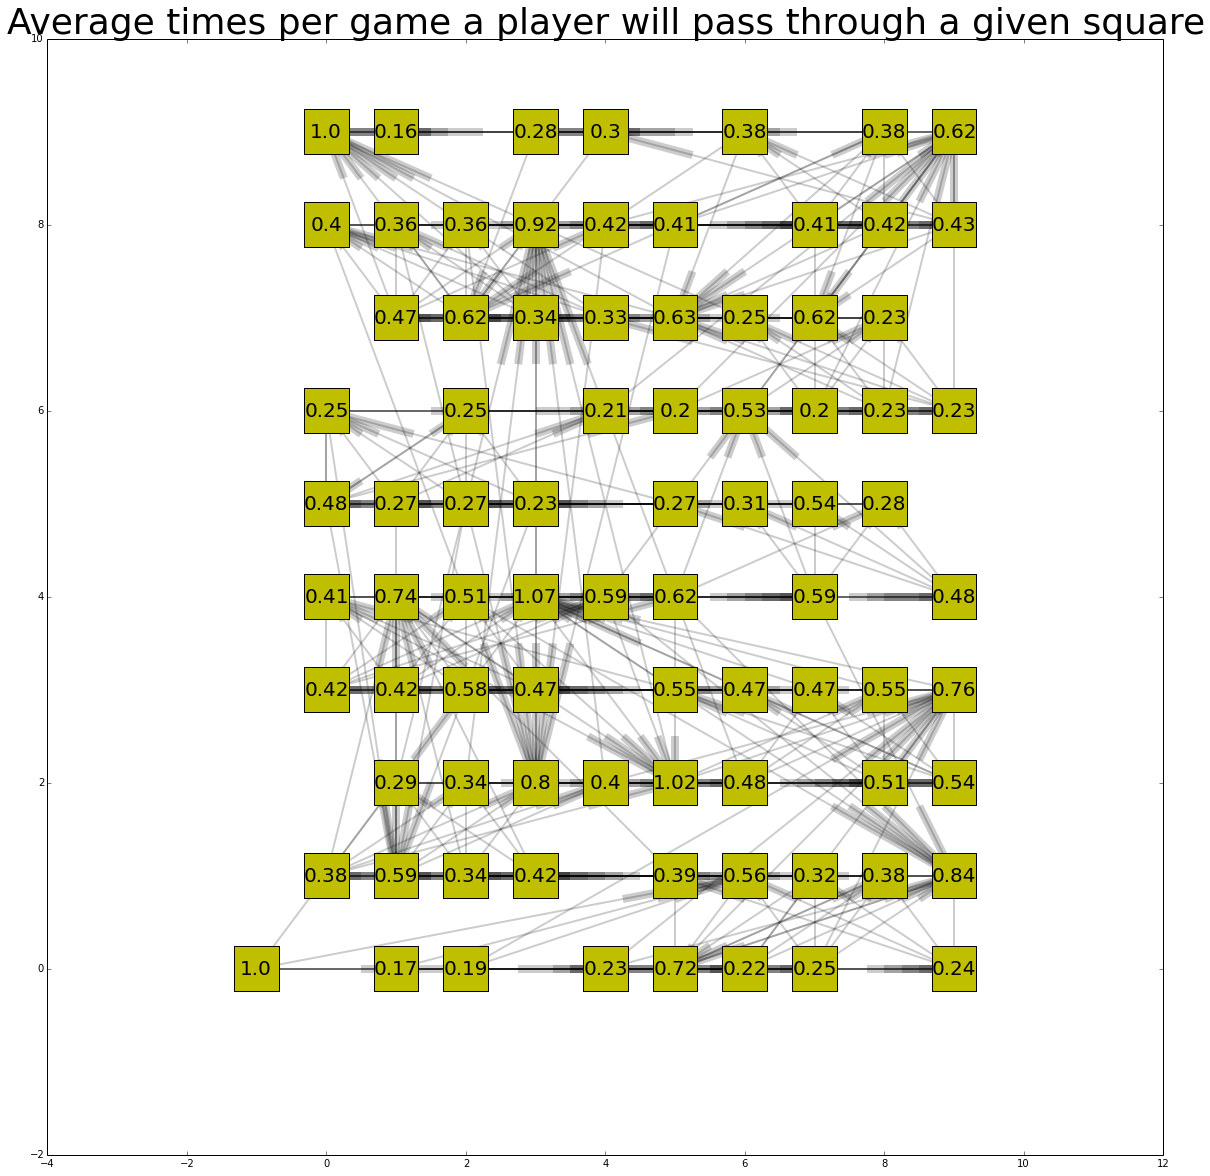

In [48]:
# Average times per game a player will pass through a given square

adj = A.T
adj[0, -1] = 1.
_, vectors = np.linalg.eig(adj)
principal_component = vectors[:, 0]
pc_array = np.array(principal_component).reshape(-1)
pc_array /= pc_array[0]
pc_array.astype(float)
labels = dict(zip(sorted(nodes), map(float, pc_array.round(2))))

draw_graph('Average times per game a player will pass through a given square', labels=labels)